In [1]:
%reset -f
from A_Functions import *

In [2]:
# Create Noise Type
# Give a name for your noise - be precise to make it easy to detect what type it is
# Example 'NoiseConst_2nA' or 'NoiseDS_2A10Hz_9A1Hz'
namenoise = 'VerifyCode'

# extra step to make a new file with the same name only with 'SimParams.mat' added
#simparameter=list(namenoise)
#simparameter.append('_SimParams.mat')
#simparameter="".join(simparameter)

## input of NoiseGenerator for double sine is :
# (amount of noise sources, 'DS', [offset sine1,offset sine2,amplitude sine1 (nA), frequency sine1(Hz),,
#amplitude sine2, frequency sine2], duration in ms, name of the file)

## input of NoiseGenerator for OU is :
# (amount of noise sources, 'OU', [initial I, initial I0, sigma], duration in ms, name of the file)

## input of NoiseGenerator Constant value :
# (amount, 'const',[constant value in nA], duration in ms, name of the file)

Noise_t,Noise_I,N_Noise=NoiseGenerator(2,'DS',[1 ,1     # offset in nA
                                               , 0.1, 0.1 # amplitude in nA
                                               ,2,20   # frequency in Hz
                                              ],2500,namenoise)

#Noise_t,Noise_I,N_Noise=NoiseGenerator(5,'DS',[1 ,0.5, 0, -0.5, -1,     #offsets in nA
#                                              1, 0.5, 0, 0.5, 1, #amplitude in nA
#                                              20, 2, 2, 20, 2]         # frequency in Hz
#                                              ,2500,namenoise,simparameter)

#Noise_const15 = NoiseGenerator(2,'const',[1.5],10,'Noise_const15')



Noise input is of type double sine
Data is saved


In [3]:
SimParams = {}
######################## Save
SimParams['saving'] = 'yes' #'yes','no'
######################## plot
SimParams['plotting'] = 'yes' #'yes','no'
######################## Experiment length
SimParams['dt'] = 0.025*ms
SimParams['exp_runtime'] = asarray(size(Noise_t)*SimParams['dt'])
#print(type(SimParams['exp_runtime']*second))
######################## Neuronal responses to run. 
SimParams['IO_response']='both' #'oscillatory', 'non', 'spiking', 'both' 
SimParams['N_Cells_PC'] = 10
SimParams['N_Cells_DCN'] = 20
SimParams['N_Cells_IO'] = 20
name = namenoise+'SimParam.pickle'
######################## Saving SimParams
with open(name, 'wb') as sims:
    pickle.dump(SimParams,sims, pickle.HIGHEST_PROTOCOL)
#sio.savemat('SimParams.mat', mdict={'SimParams': SimParams})

In [4]:
#from E_Synapses_NoPlasticity import *
from E_Synapses_Plasticity import *
#visualise(S_Coupled_noSTDP)

loading went fine


WARNING    The expression "(conn_target - noise_source) / N_Cells_PC" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


nr of noise is 2
final static weights STDP [0.52631579 0.47368421 0.47058824 0.46666667 0.46153846 0.45454545
 0.44444444 0.42857143 0.4        0.33333333 0.47368421 0.52631579
 0.52941176 0.53333333 0.53846154 0.54545455 0.55555556 0.57142857
 0.6        0.66666667]
new weights <dummy_Coupled.weight: array([0.52631579, 0.47368421, 0.47058824, 0.46666667, 0.46153846,
       0.45454545, 0.44444444, 0.42857143, 0.4       , 0.33333333,
       0.47368421, 0.52631579, 0.52941176, 0.53333333, 0.53846154,
       0.54545455, 0.55555556, 0.57142857, 0.6       , 0.66666667])>
final static weights uncoupled STDP [0.52631579 0.47368421 0.47058824 0.46666667 0.46153846 0.45454545
 0.44444444 0.42857143 0.4        0.33333333 0.47368421 0.52631579
 0.52941176 0.53333333 0.53846154 0.54545455 0.55555556 0.57142857
 0.6        0.66666667]


In [5]:
run(exp_runtime*2,report='text')

Starting simulation at t=0. s for a duration of 5. s
0.382325 (7%) simulated in 10s, estimated 2m 1s remaining.
0.826225 (16%) simulated in 20s, estimated 1m 41s remaining.
1.2718000000000003 (25%) simulated in 30s, estimated 1m 28s remaining.
1.7167000000000001 (34%) simulated in 40s, estimated 1m 17s remaining.
2.160825 (43%) simulated in 50s, estimated 1m 6s remaining.
2.6071750000000007 (52%) simulated in 1m 0s, estimated 55s remaining.
3.0387750000000002 (60%) simulated in 1m 10s, estimated 45s remaining.
3.482025 (69%) simulated in 1m 20s, estimated 35s remaining.
3.9324000000000003 (78%) simulated in 1m 30s, estimated 24s remaining.
4.375025 (87%) simulated in 1m 40s, estimated 14s remaining.
4.818825 (96%) simulated in 1m 50s, estimated 4s remaining.
5.0 (100%) simulated in 1m 54s


In [6]:
#run(exp_runtime,report='text')

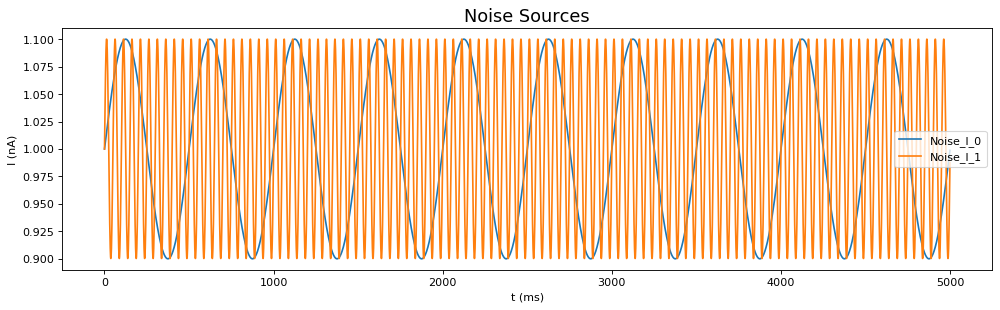

Plasticity


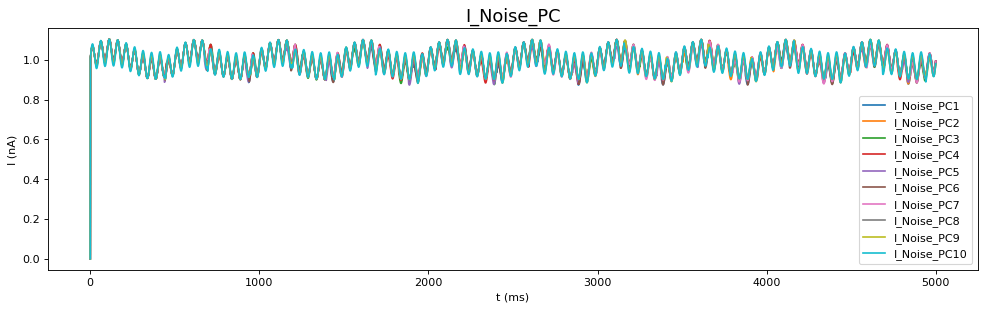

Plasticity Coupled Scenario


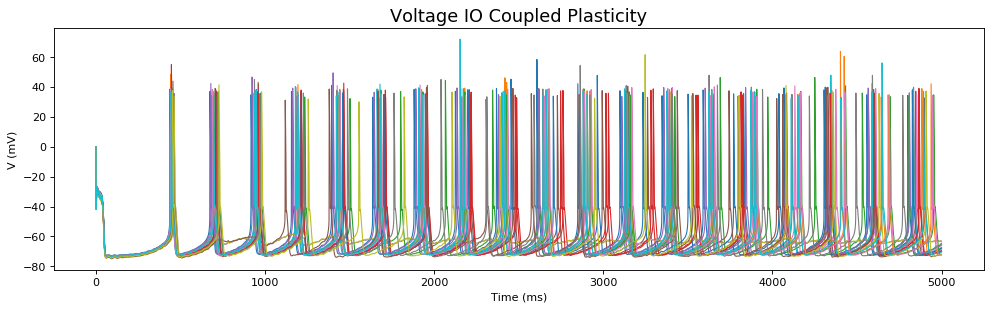

Number of spikes DCN: 155
Number of spikes DCN: 158
Number of spikes DCN: 144
Number of spikes DCN: 156
Number of spikes DCN: 140
Number of spikes DCN: 143
Number of spikes DCN: 152
Number of spikes DCN: 157
Number of spikes DCN: 129
Number of spikes DCN: 151


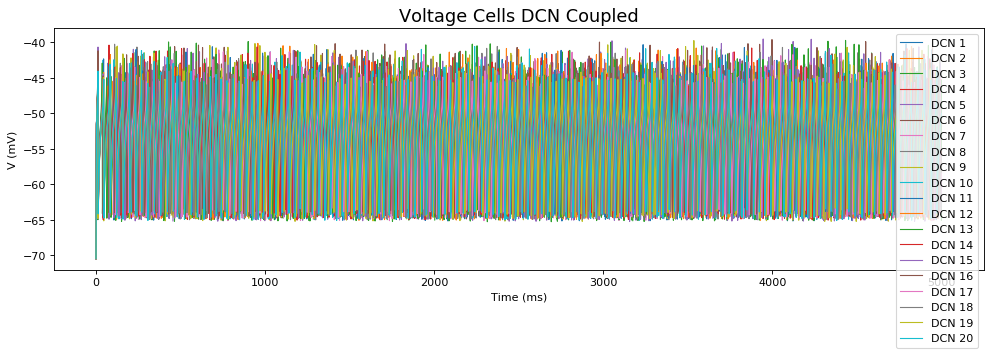

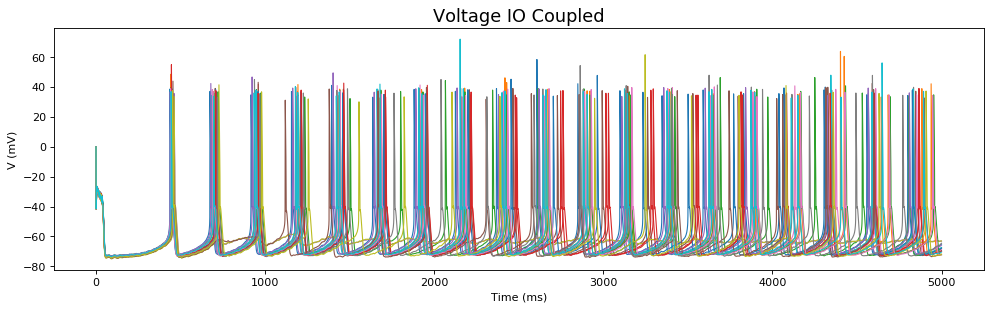

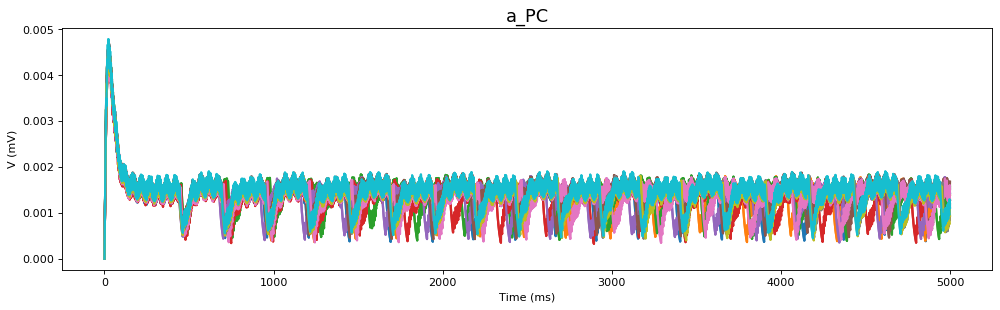

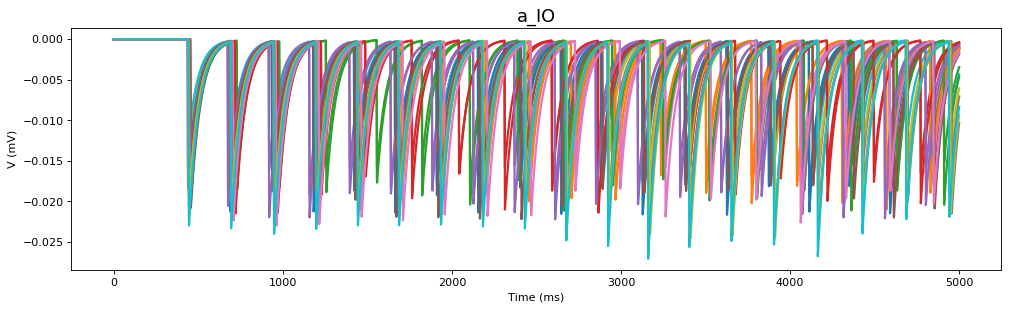

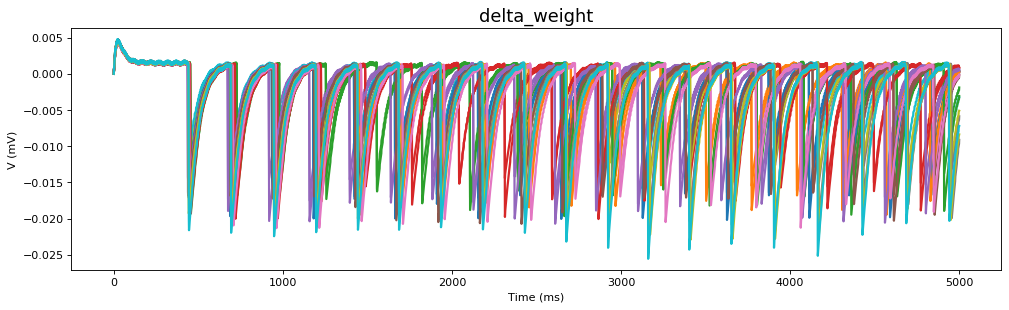

Plasticity Uncoupled Scenario


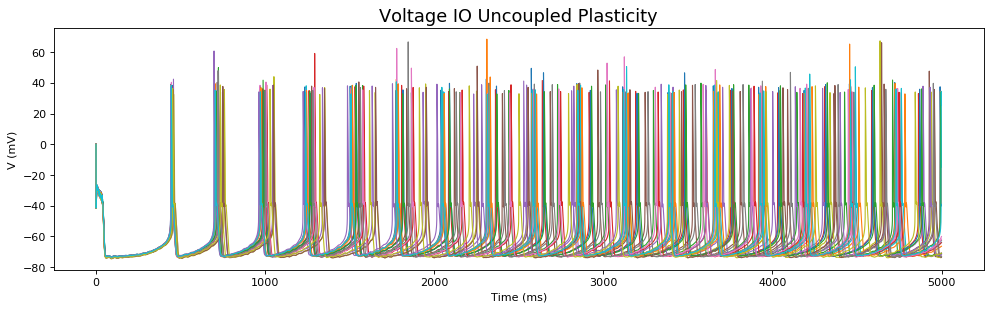

Number of spikes DCN: 154
Number of spikes DCN: 157
Number of spikes DCN: 143
Number of spikes DCN: 155
Number of spikes DCN: 141
Number of spikes DCN: 142
Number of spikes DCN: 150
Number of spikes DCN: 156
Number of spikes DCN: 130
Number of spikes DCN: 151


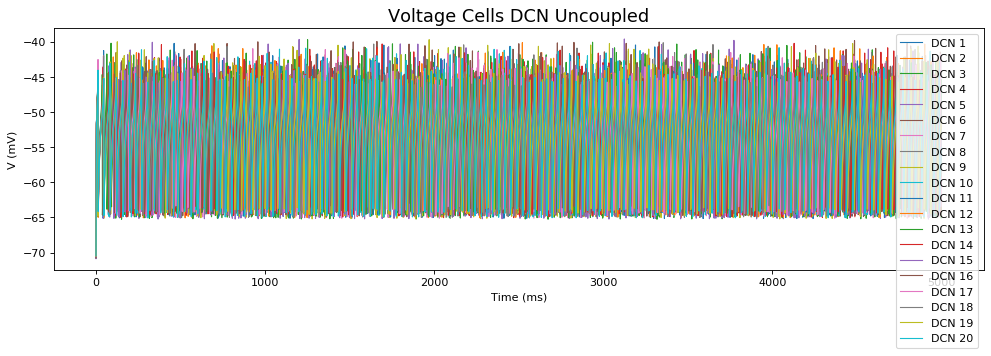

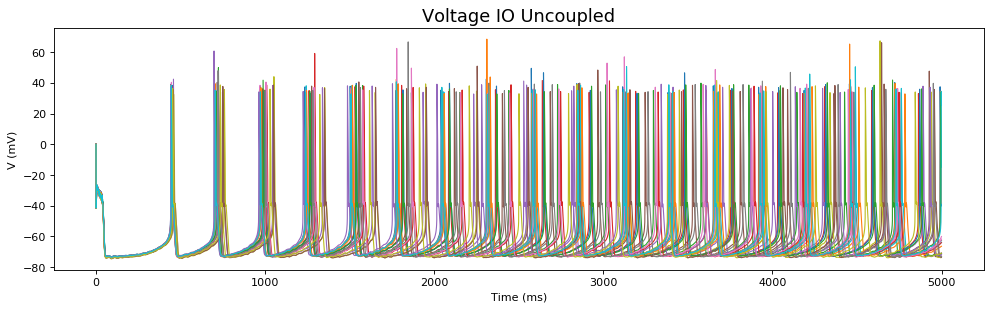

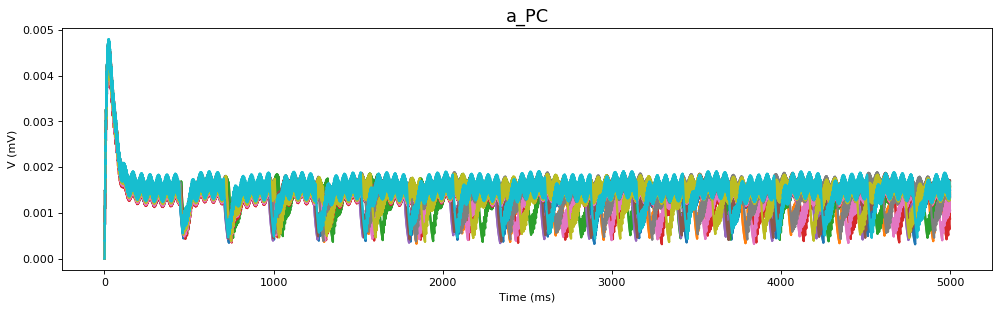

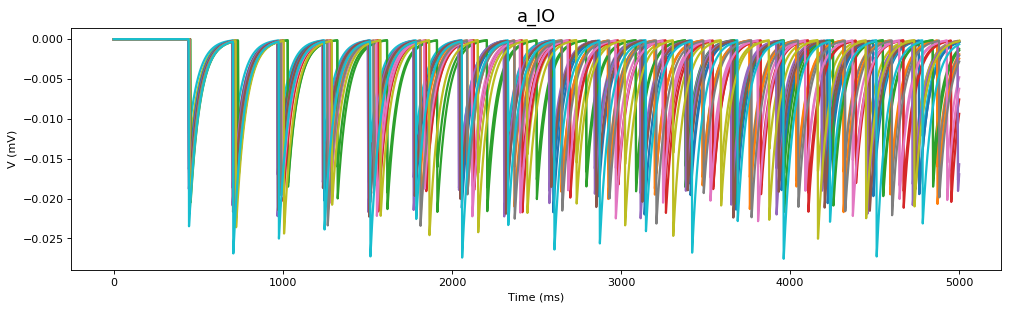

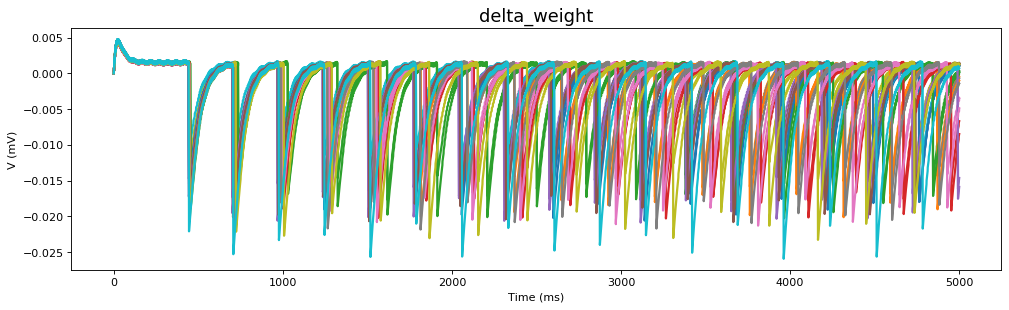

In [7]:
from G_Plot_Plasticity import *
%matplotlib notebook

In [8]:
from F_save_data_Plasticity import *

Plasticity variables are saved
Inputs are saved
Voltage Cells are saved
Spike Times are saved


In [9]:
#run(exp_runtime,report='text')

In [10]:
#from G_Plot_Plasticity import *

In [11]:
visualise(S_IO_N_Coupled)
visualise(S_IO_N_Uncoupled)

visualise(Synapse_IO_PC_Coupled_noSTDP)
visualise(Synapse_IO_PC_Uncoupled_noSTDP)
visualise(Synapse_IO_PC_Coupled_STDP)
visualise(Synapse_IO_PC_Uncoupled_STDP)

visualise(IO_DCN_Synapse_Coupled_noSTDP)
visualise(IO_DCN_Synapse_Uncoupled_noSTDP)
visualise(IO_DCN_Synapse_Coupled_STDP)
visualise(IO_DCN_Synapse_Uncoupled_STDP)

visualise(DCN_PC_Synapse_Coupled_noSTDP)
visualise(DCN_PC_Synapse_Uncoupled_noSTDP)
visualise(DCN_PC_Synapse_Coupled_STDP)
visualise(DCN_PC_Synapse_Uncoupled_STDP)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: name 'Synapse_IO_PC_Coupled_noSTDP' is not defined